<a href="https://colab.research.google.com/github/Jacob130000x/Code/blob/main/DecisionTreeStockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Decision Tree Stock Prediction

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd

In [22]:
#stuff needed to get the data
import pandas as pd
import datetime
import time
import requests
import io

In [23]:
pip install yfinance

In [24]:

import yfinance as yf

In [25]:
start = datetime.datetime(2021,2,1)
end = datetime.datetime(2021,3,3)

In [26]:
url="https://pkgstore.datahub.io/core/nasdaq-listings/nasdaq-listed_csv/data/7665719fb51081ba0bd834fde71ce822/nasdaq-listed_csv.csv"
s = requests.get(url).content
companies = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [27]:
Symbols = companies['Symbol'].tolist()

In [28]:
# create empty dataframe
stock_final = pd.DataFrame()
# iterate over each symbol
for i in Symbols:  
    
    # print the symbol which is being downloaded
    print( str(Symbols.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)  
    
    try:
        # download the stock price 
        stock = []
        stock = yf.download(i,start=start, end=end, progress=False)
        
        # append the individual stock prices 
        if len(stock) == 0:
            None
        else:
            stock['Name']=i
            stock_final = stock_final.append(stock,sort=False)
    except Exception:
        None

0 : AAIT,1 : AAL,2 : AAME,3 : AAOI,4 : AAON,5 : AAPL,6 : AAVL,
1 Failed download:
- AAVL: No data found for this date range, symbol may be delisted
7 : AAWW,8 : AAXJ,9 : ABAC,
1 Failed download:
- ABAC: No data found for this date range, symbol may be delisted
10 : ABAX,
1 Failed download:
- ABAX: No data found for this date range, symbol may be delisted
11 : ABCB,12 : ABCD,
1 Failed download:
- ABCD: No data found for this date range, symbol may be delisted
13 : ABCO,14 : ABCW,
1 Failed download:
- ABCW: No data found for this date range, symbol may be delisted
15 : ABDC,
1 Failed download:
- ABDC: No data found, symbol may be delisted
16 : ABGB,
1 Failed download:
- ABGB: No data found for this date range, symbol may be delisted
17 : ABIO,18 : ABMD,19 : ABTL,
1 Failed download:
- ABTL: No data found for this date range, symbol may be delisted
20 : ABY,
1 Failed download:
- ABY: No data found for this date range, symbol may be delisted
21 : ACAD,22 : ACAS,
1 Failed download:
- ACAS: N

KeyboardInterrupt: ignored

In [56]:
stock_final.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2021-02-01,0.067,0.068,0.067,0.067,0.067,129000,AAIT
2021-02-02,0.066,0.066,0.066,0.066,0.066,41000,AAIT
2021-02-03,0.066,0.067,0.066,0.066,0.066,278551,AAIT
2021-02-04,0.066,0.068,0.065,0.066,0.066,258238,AAIT
2021-02-08,0.067,0.067,0.066,0.067,0.067,1284447,AAIT


In [57]:

dfStock = stock_final[stock_final['Name']== 'AAIT']

In [58]:
dfStock.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2021-02-01,0.067,0.068,0.067,0.067,0.067,129000,AAIT
2021-02-02,0.066,0.066,0.066,0.066,0.066,41000,AAIT
2021-02-03,0.066,0.067,0.066,0.066,0.066,278551,AAIT
2021-02-04,0.066,0.068,0.065,0.066,0.066,258238,AAIT
2021-02-08,0.067,0.067,0.066,0.067,0.067,1284447,AAIT


In [59]:

dfStock['Price_Up'] = np.where(dfStock['Close'].shift(-1) > dfStock['Close'], 1, 0)

dfStock

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Open,High,Low,Close,Adj Close,Volume,Name,Price_Up
Date,,,,,,,,
2021-02-01,0.067,0.068,0.067,0.067,0.067,129000,AAIT,0
2021-02-02,0.066,0.066,0.066,0.066,0.066,41000,AAIT,0
2021-02-03,0.066,0.067,0.066,0.066,0.066,278551,AAIT,0
2021-02-04,0.066,0.068,0.065,0.066,0.066,258238,AAIT,1
2021-02-08,0.067,0.067,0.066,0.067,0.067,1284447,AAIT,0
2021-02-09,0.067,0.068,0.067,0.067,0.067,600650,AAIT,0
2021-02-10,0.067,0.067,0.067,0.067,0.067,278543,AAIT,0
2021-02-11,0.067,0.067,0.066,0.066,0.066,484325,AAIT,0
2021-02-16,0.066,0.066,0.065,0.066,0.066,475400,AAIT,0


In [68]:
dfS = dfStock.drop(columns=['Name'])
dfS

,Open,High,Low,Close,Adj Close,Volume,Price_Up
Date,,,,,,,
2021-02-01,0.067,0.068,0.067,0.067,0.067,129000,0
2021-02-02,0.066,0.066,0.066,0.066,0.066,41000,0
2021-02-03,0.066,0.067,0.066,0.066,0.066,278551,0
2021-02-04,0.066,0.068,0.065,0.066,0.066,258238,1
2021-02-08,0.067,0.067,0.066,0.067,0.067,1284447,0
2021-02-09,0.067,0.068,0.067,0.067,0.067,600650,0
2021-02-10,0.067,0.067,0.067,0.067,0.067,278543,0
2021-02-11,0.067,0.067,0.066,0.066,0.066,484325,0
2021-02-16,0.066,0.066,0.065,0.066,0.066,475400,0


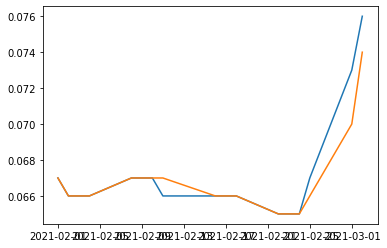

In [69]:
import matplotlib.pyplot as plt

plt.plot(dfS['Close'])
plt.plot(dfS['Open'])

In [70]:
#Split the data set into a feature and a target data set

X = dfS.iloc[:, 0: dfS.shape[1]-1].values
Y = dfS.iloc[:, dfS.shape[1]-1].values

In [71]:
#split into 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [72]:
X_train

array([[6.59999996e-02, 6.59999996e-02, 6.59999996e-02, 6.59999996e-02,
        6.59999996e-02, 0.00000000e+00],
       [6.70000017e-02, 6.70000017e-02, 6.70000017e-02, 6.70000017e-02,
        6.70000017e-02, 2.78543000e+05],
       [6.59999996e-02, 6.70000017e-02, 6.59999996e-02, 6.59999996e-02,
        6.59999996e-02, 2.78551000e+05],
       [6.70000017e-02, 6.80000037e-02, 6.70000017e-02, 6.70000017e-02,
        6.70000017e-02, 6.00650000e+05],
       [6.70000017e-02, 6.70000017e-02, 6.59999996e-02, 6.59999996e-02,
        6.59999996e-02, 4.84325000e+05],
       [6.70000017e-02, 6.70000017e-02, 6.59999996e-02, 6.70000017e-02,
        6.70000017e-02, 1.28444700e+06],
       [7.40000010e-02, 7.69999996e-02, 7.40000010e-02, 7.59999976e-02,
        7.59999976e-02, 9.45574100e+06],
       [6.49999976e-02, 6.49999976e-02, 6.49999976e-02, 6.49999976e-02,
        6.49999976e-02, 6.19320000e+04],
       [6.59999996e-02, 6.89999983e-02, 6.59999996e-02, 6.70000017e-02,
        6.70000017e-02, 

In [73]:
#create and train the model(DecisionTreeClassifier)
tree= DecisionTreeClassifier().fit(X_train, Y_train)

#show how well it did on the test data set
print(tree.score(X_test, Y_test))

0.75


In [74]:
#show predictions
tree_predictions = tree.predict(X_test)
print(tree_predictions)

[0 0 0 0]


In [75]:
#show acrual values 
Y_test

array([0, 0, 1, 0])